In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Lineas para GoogleColab

In [2]:
#from google.colab import files

In [3]:
#uploaded = files.upload()
#titanic = pd.read_csv("")

In [4]:
#titanic = pd.read_csv("train.csv")

# Para trabajar en local

In [7]:
titanic = pd.read_csv(r"C:\Users\santi\OneDrive\Documentos\Santi Documentos\Facultad UTN\5° Año\Ciencia de datos\train.csv",delimiter=',')

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.shape

(891, 12)

In [10]:
#Vemos la distribución de la variable objetivo
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic['Pclass'] = titanic['Pclass'].map({1 : 'Primera Clase' ,2 : 'Segunda Clase', 3: "Tercera Clase"})

In [13]:
# columnas del dataframe
print(titanic.columns.values)
print('_'*50)
print(titanic.info())
# Age, Cabin y Embarked contienen nulos

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None


In [14]:
titanic[titanic["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,Tercera Clase,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,Segunda Clase,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,Tercera Clase,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,Tercera Clase,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,Tercera Clase,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [15]:
survivors = titanic[titanic['Survived'] == 1]
print('The total number of survivors is: ' + str(len(survivors)))
drowned = titanic[titanic['Survived'] == 0]
print('The total number of deaths is: ' + str(len(drowned)))

The total number of survivors is: 342
The total number of deaths is: 549


In [16]:
print(survivors['Sex'].value_counts())
print(drowned['Sex'].value_counts())

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


In [17]:
#Forma mas fancy de calcularlo
titanic_stats = titanic.groupby('Sex').agg({'Survived':['mean'], 'Age':['mean'], 'SibSp':['sum'], 'Parch':['sum']})
titanic_stats

,Survived,Age,SibSp,Parch
,mean,mean,sum,sum
Sex,,,,
female,0.742038,27.915709,218,204
male,0.188908,30.726645,248,136


In [18]:
titanic = titanic.drop('Cabin', 1)

In [19]:
# Lleno vacíos de age con edad promedio
#Lleno Embarked vacíos con "S"
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic['Embarked'].fillna('S', inplace = True)
titanic.info()
#Confirmamos que no hay más vacíos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


             PassengerId  Survived       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007  0.033207 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.069809 -0.035322  0.081629  0.257307
Age             0.033207 -0.069809  1.000000 -0.232625 -0.179191  0.091566
SibSp          -0.057527 -0.035322 -0.232625  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629 -0.179191  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.091566  0.159651  0.216225  1.000000


<AxesSubplot:>

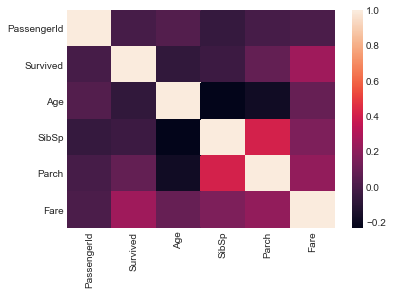

In [20]:
#Imprimimos la matriz de correlación para ver si existen variables correlacioandas
corr = titanic.corr()
print(corr)
sns.heatmap(corr)

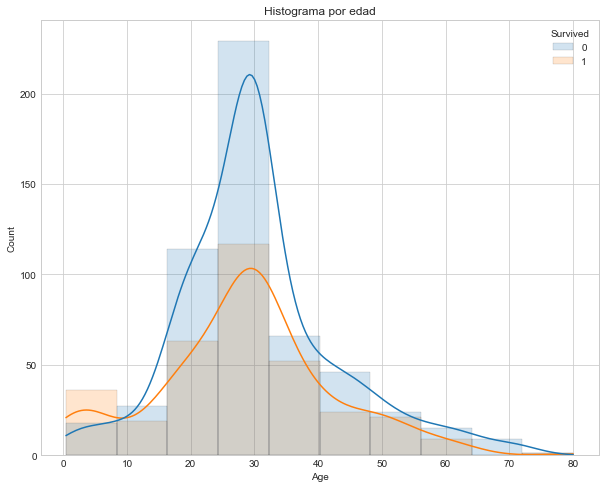

In [21]:
#Histograma por edad
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
age=sns.histplot(titanic, x="Age", bins = 10,hue="Survived", kde="True", alpha=0.2, linewidth=0.1)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histograma por edad")
plt.show(age)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

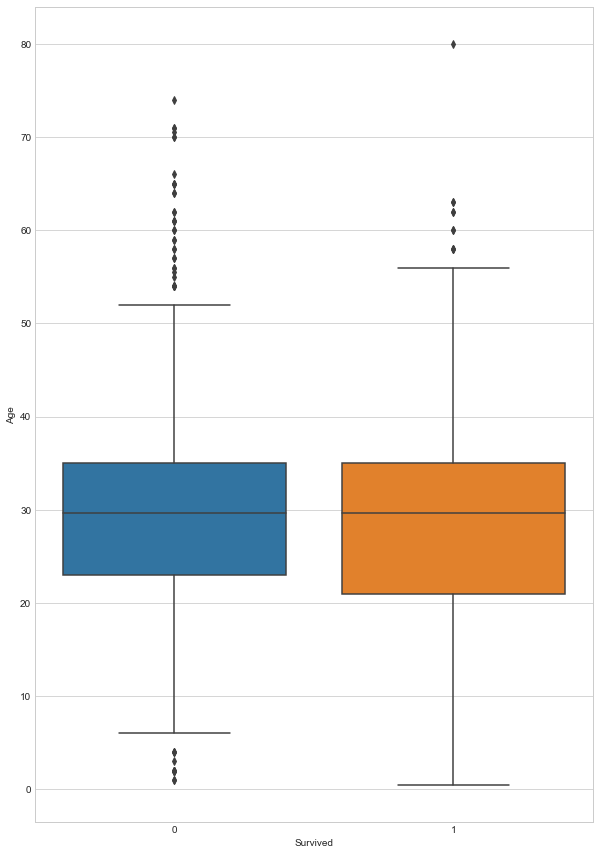

In [22]:
#Utilizamos un boxplot para ver como se distribuye la edad en función de si sobrevivió o no.
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Survived", y="Age", data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

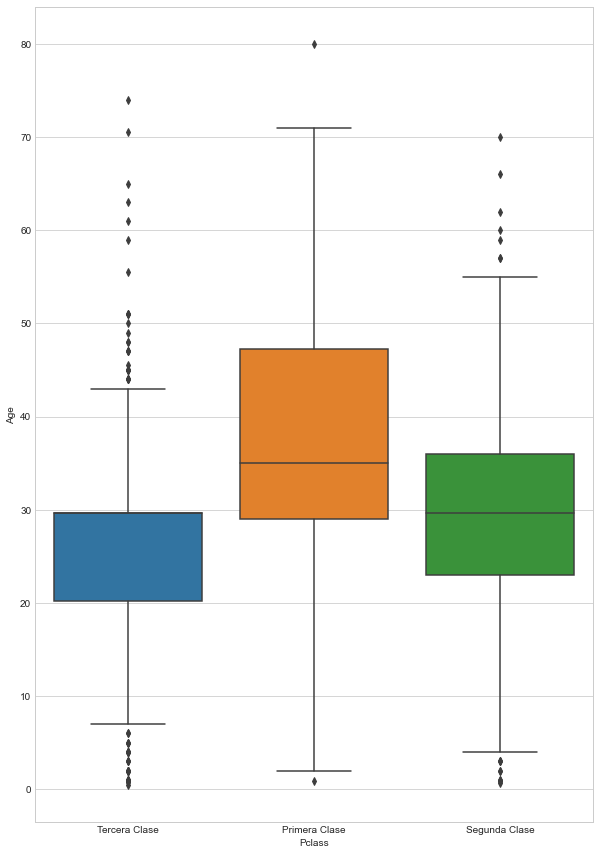

In [23]:
#Utilizamos un boxplot para ver como se distribuye la edad en función de las clases.
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Pclass", y="Age", data=titanic)

In [24]:
# Eliminamos variables.
titanic = titanic.drop(['PassengerId',"Name", "Ticket"], 1)

In [25]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [26]:
x = titanic.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = titanic.loc[:,['Survived']]

In [27]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Tercera Clase,male,22.0,1,0,7.2500,S
1,Primera Clase,female,38.0,1,0,71.2833,C
2,Tercera Clase,female,26.0,0,0,7.9250,S
3,Primera Clase,female,35.0,1,0,53.1000,S
4,Tercera Clase,male,35.0,0,0,8.0500,S


In [29]:
x = pd.get_dummies(data=x, columns=['Pclass','Sex','Embarked'])

In [30]:
x.head()

,Age,SibSp,Parch,Fare,Pclass_Primera Clase,Pclass_Segunda Clase,Pclass_Tercera Clase,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=27, stratify=y)

In [32]:
norm = MinMaxScaler().fit(X_train)

In [33]:
X_train_norm = norm.transform(X_train)

In [34]:
X_test_norm = norm.transform(X_test)

## **Logistic Regression**

In [35]:
param_lr = {'C':[1, 10, 100, 1000], "penalty": ("l1", "l2"), "solver":("lbfgs", "liblinear")}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr, param_grid = param_lr , scoring= 'accuracy', refit = True, cv = 3)
clf_lr.fit(X_train_norm, y_train.ravel())


C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\santi\Anaconda3\lib\site-packages\

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
scores = clf_lr.cv_results_

In [37]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_lr.best_params_, clf_lr.best_score_))

Los mejores paramentros son {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} con un score de 0.81


## **KNN**

In [38]:
neigh = KNeighborsClassifier()

In [39]:
param_neigh = {'n_neighbors':[1, 10, 100, 200]}

In [40]:
clf = GridSearchCV(neigh, param_grid = param_neigh,scoring= 'accuracy', refit = True, cv = 3)
clf.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 10, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [41]:
scores = clf.cv_results_

In [42]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf.best_params_, clf.best_score_))

Los mejores paramentros son {'n_neighbors': 10} con un score de 0.79


## **SVM**

In [43]:
param_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}

In [44]:
svc = svm.SVC()

In [45]:
clf_svm = GridSearchCV(svc, param_grid = param_svc, refit = True, cv = 3)

In [46]:
clf_svm.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
scores = clf_svm.cv_results_

In [48]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_svm.best_params_, clf_svm.best_score_))

Los mejores paramentros son {'C': 10, 'gamma': 1, 'kernel': 'rbf'} con un score de 0.81


## **Random Forest**


In [49]:
rf= RandomForestClassifier(class_weight='balanced', random_state=1)

In [50]:
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8], 
               'max_depth': [5, 20, 50, 70], 
               'min_samples_leaf':[1, 5, 8, 10]}

In [51]:
clf_rf = GridSearchCV(rf, param_grid = param_trees,scoring= 'accuracy', refit = True, cv = 3)
clf_rf.fit(X_train_norm, y_train.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                             

In [52]:
scores = clf_rf.cv_results_

In [53]:
print("Los mejores paramentros son %s con un score de %0.2f" % (clf_rf.best_params_, clf_rf.best_score_))

Los mejores paramentros son {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 200} con un score de 0.82


## **Evaluamos el mejor modelo**

In [54]:
rf2= RandomForestClassifier(max_depth= 5, max_features= 8, min_samples_leaf= 1, n_estimators = 200)

In [55]:
rf2.fit(X_train_norm, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
ypred = rf2.predict(X_test_norm)

In [57]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8156424581005587


In [58]:
#compute and plot AUC
yproba = rf2.predict_proba(X_test_norm)
fpr1, tpr1, thresholds = roc_curve(y_test.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.8710144927536232


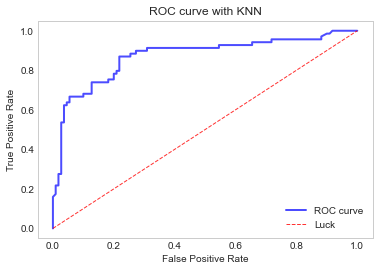

In [59]:

plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

In [60]:

# Compute confusion Matrix
cm = confusion_matrix(y_test, ypred)
cm

array([[96, 14],
       [19, 50]], dtype=int64)

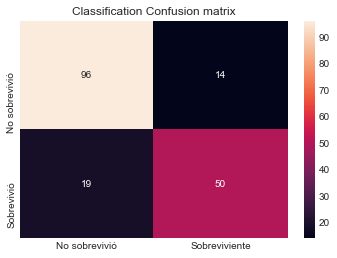

In [61]:

df_cm = pd.DataFrame(cm, index = ['No sobrevivió', 'Sobrevivió'], columns = ['No sobrevivió', "Sobreviviente"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()